# Assessment of Inter-Annotator Agreement

This notebooks outlines basic statistics about the re-curation of the ten NeuroMMSig subgraphs.

In [43]:
import os
import sys
import time

import matplotlib.pyplot as plt
import neurommsig_knowledge
import pandas as pd
import pybel
import pybel_tools
import seaborn as sns
from pybel_tools.summary import count_annotation_values
from nltk import agreement

In [2]:
%matplotlib inline

## Environment

In [3]:
print(sys.version)

3.7.2 (default, Jan 13 2019, 12:50:15) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [4]:
print(time.asctime())

Tue Apr  2 12:50:24 2019


In [5]:
print(pybel.get_version())

0.13.2-dev


In [6]:
print(pybel_tools.get_version())

0.7.3-dev


## Data Acquisition

Load and combine the graphs using PyBEL

In [7]:
graph = neurommsig_knowledge.repository.get_graph()
graph.summarize()

NeuroMMSig v2.0.0
Number of Nodes: 2003
Number of Edges: 6829
Number of Citations: 1035
Number of Authors: 0
Network Density: 1.70E-03
Number of Components: 14
Number of Warnings: 0


Count Confidence annotation values

In [12]:
confidences = count_annotation_values(graph, 'Confidence')

## Statistics

In [44]:
# Assume that all the statements before were correct
total_statements = sum(confidences.values())

# y1 corresponds to all correct statements before re-curation
y1 = [1] * total_statements

y2 = (
    [1] * confidences['High'] 
    + [1] * confidences['Very High'] 
    + [0] * confidences['Low'] 
    + [0] * confidences['Medium']
)

data = [
    (0, str(i), str(element))
    for i, element in enumerate(y1)
] + [
    (1, str(i), str(element))
    for i, element in enumerate(y2)
]

annotation_task = agreement.AnnotationTask(data=data)

Calculate Cohen's Kappa and Scott's pi coefficient

In [38]:
scott_pi = annotation_task.pi()
scott_pi

-0.2556359875904863

In [39]:
cohen_kappa = annotation_task.kappa()
cohen_kappa

0.0

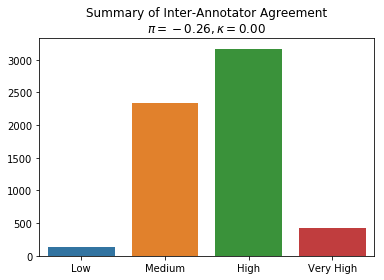

In [49]:
sns.barplot(data=pd.DataFrame({
    'Low': [confidences['Low']],
    'Medium':[confidences['Medium']],
    'High': [confidences['High']],
    'Very High': [confidences['Very High']],
}))

plt.title(f'Summary of Inter-Annotator Agreement\n$\pi={scott_pi:.2f}, \kappa={cohen_kappa:.2f}$')
plt.show()

Since we conducted a **re-curation approach** (i.e., one curator recurates BEL triplets that have previously been annotated), the following issues arise when calculating Cohen's Kappa score and Scott's pi coefficient:

1. The second curator knows what has been coded already by the original curator. In other words, the first curator decides what is "right" and the second curator evaluates relative to the first curator. This does not fit with the assumptions of both Cohen's Kappa score and Scott's pi coefficient since they first assume independence in the inter-annotation, something that does not apply to our approach.
2. We assume that the original curator had correctly annotated all the BEL triplets. This conflicts also with the way that these two coefficients are calculated. To illustrate the problem, we show the confusion matrix used to calculate the Cohen's Kappa score below. Note that the the curation results of the original curator correspond to the table columns and the curation results of the second curator to the table rows.

<table>
    <thead>
        <tr>
        <td></td>
        <td>Correct</td>
        <td>Wrong</td>
        </tr>
    </thead>
    <tbody>
        <tr>
        <td>Correct</td>
        <td>3599</td>
        <td>0</td>
        </tr>
        <tr>
        <td>Wrong</td>
        <td>2472</td>
        <td>0</td>
        </tr>
    </tbody>
</table>

**Ultimately, we have decided not report these two statistics in the manuscript**

*References*
- Scott, W. (1955). "Reliability of content analysis: The case of nominal scale coding." Public Opinion Quarterly, 19(3), 321-325.
-  J. Cohen (1960). “A coefficient of agreement for nominal scales”. Educational and Psychological Measurement 20(1):37-46. doi:10.1177/001316446002000104.